In [ ]:
!wget https://www.dropbox.com/s/75ne99gowr4itx2/Lab5.zip
!unzip Lab5.zip
!rm Lab5.zip

--2021-06-03 10:37:55--  https://www.dropbox.com/s/75ne99gowr4itx2/Lab5.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/75ne99gowr4itx2/Lab5.zip [following]
--2021-06-03 10:37:55--  https://www.dropbox.com/s/raw/75ne99gowr4itx2/Lab5.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc89fbf975981cb4cacb000a029.dl.dropboxusercontent.com/cd/0/inline/BPvTLOoTUCsubTbKDGPz2CUFAVOiN_fQwMtmps-Sm8h6kB7iVRWZYqPe-li0jH0EFmGiTPsGXvj2WvMvJijjG03BvzV3oUS50IXFNgL3z6L2_ljkaAxYyUhnPdwXrsbeNGNdL9EV5TMqYAs-zNVmqT4G/file# [following]
--2021-06-03 10:37:56--  https://ucc89fbf975981cb4cacb000a029.dl.dropboxusercontent.com/cd/0/inline/BPvTLOoTUCsubTbKDGPz2CUFAVOiN_fQwMtmps-Sm8h6kB7iVRWZYqPe-li0jH0EFmGiTPsGXvj2WvMvJijjG03BvzV3oUS50IXFNg

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import correlate,convolve

### Edge Detection

In [ ]:
from skimage.feature import peak_local_max
from scipy import signal as sig

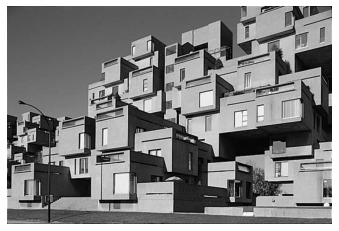

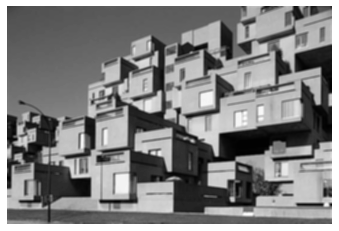

[[ 186    2    3 ...  -52  -29 -135]
 [ 250    1    4 ...  -66  -36 -189]
 [ 259    0    4 ...  -61  -31 -211]
 ...
 [ 578   -6   22 ...  -11    0 -362]
 [ 561    3   37 ...  -27  -10 -332]
 [ 420    5   32 ...  -27  -11 -240]]


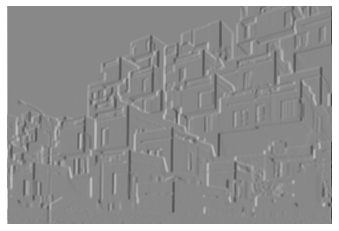

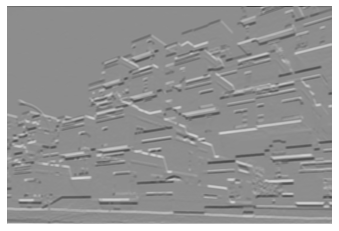

'Write your code here'

In [ ]:
# load image

habitat_img = cv2.imread('./Lab5/habitat_67.jpg', 0)
plt.imshow(habitat_img, cmap='gray'), plt.axis("off")
plt.show()
#blur the image using (3*3) gaussian kernel with segma = 2
blurred  = cv2.GaussianBlur(habitat_img,(5,5),2)
plt.imshow(blurred, cmap='gray'), plt.axis("off")
plt.show()

sobel_x = [[1, 0, -1],
           [2, 0, -2],
           [1, 0, -1]]
        
sobel_y = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]
ix=sig.convolve2d(blurred, sobel_x, mode='same')
print(ix)
iy=sig.convolve2d(blurred, sobel_y, mode='same')
plt.imshow(ix, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(iy, cmap='gray'), plt.axis("off")
plt.show()
"""Write your code here"""


[[   0.   24.   18. ... -106. -166.    0.]
 [   0.   12.    7. ...  -99. -217.    0.]
 [   0.   -7.   -6. ...  -46. -261.    0.]
 ...
 [   0.  252. -146. ...   78. -116.    0.]
 [   0.  261.  -96. ...   27. -119.    0.]
 [   0.  238.  -54. ...   -6.  -98.    0.]]


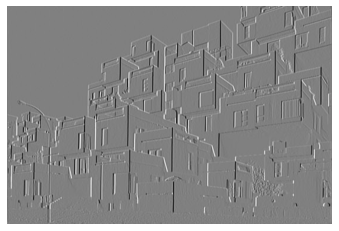

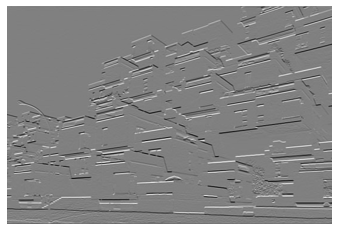

In [ ]:
#"edge detection using sobel directly, we can see it's same as manual above
# -------------------------------------------- #
sobelx = cv2.Sobel(habitat_img,cv2.CV_64F,1,0,ksize=3)
print(sobelx)
sobely = cv2.Sobel(habitat_img,cv2.CV_64F,0,1,ksize=3)
plt.imshow(sobelx, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(sobely, cmap='gray'), plt.axis("off")
plt.show()
# -------------------------------------------- #

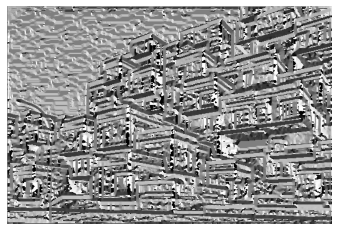

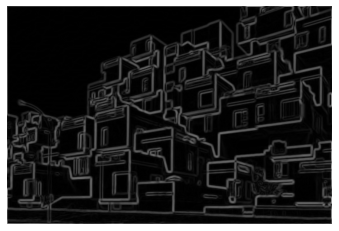

In [ ]:
direction = np.arctan2(iy,ix)
magnitude = np.sqrt((ix**2) + (iy ** 2))
standard = np.std(magnitude)
plt.imshow(direction, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(magnitude, cmap='gray'), plt.axis("off")
plt.show()
local_maximum = peak_local_max(magnitude)

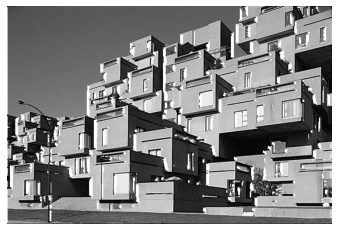

In [ ]:
new = np.copy(habitat_img)
for i in range(new.shape[0] - 1):
  for j in range(new.shape[1] - 1) :
    if (( (-(np.pi/8) <= direction[i][j] < (np.pi/8)) or (np.pi - (np.pi/8) <= direction[i][j] < (-np.pi) + (np.pi/8))) and 
        ([i,j] in local_maximum) and (magnitude[i][j] > (0.5 * standard))):
             new[i][j] = 255
plt.imshow(new, cmap='gray'), plt.axis("off")
plt.show()

### Harris Corner Detector

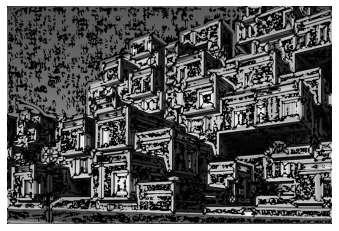

array([[  0,   0,  34, ...,  18,   0,   0],
       [  0,   0,  75, ...,  80,   0,  15],
       [ 73,  72,  70, ...,  74,  60,   5],
       ...,
       [ 75, 168,   0, ...,   0, 127,  78],
       [  0,   0, 205, ...,  95,   0,  59],
       [  6,  65,  55, ...,  13,  24,   0]], dtype=uint8)

In [ ]:
from numpy import linalg as LA
import sympy


def harris(img, sigma, threshold):
  blur = cv2.GaussianBlur(habitat_img,(5,5),1.6)

  sobel_x = [[1, 0, -1],
            [2, 0, -2],
            [1, 0, -1]]
          
  sobel_y = [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]
  Ix=np.around(sig.convolve2d(blur, sobel_x, mode='same'))
  Iy=np.around(sig.convolve2d(blur, sobel_y, mode='same'))
  Ixx = Ix * Ix
  Iyy = Iy * Iy
  Ixy = Ix * Iy

  filter = [[1,1,1],
            [1,1,1],
            [1,1,1]]
  Ixx = sig.convolve2d(Ixx, filter, mode='same')
  Iyy = sig.convolve2d(Iyy, filter, mode='same')
  Ixy = sig.convolve2d(Ixy, filter, mode='same')

  new_img = np.copy(img)
  for i in range(new_img.shape[0] - 1):
    for j in range(new_img.shape[1] - 1) :
      h_matrix = np.array([[Ixx[i][j], Ixy[i][j]],
                          [Ixy[i][j], Iyy[i][j]]])
      det = np.linalg.det(h_matrix)
      trace = np.trace(h_matrix)
      new_trace= trace**2
      if ((det - 0.06*new_trace) > threshold > 0):
        new_img[i][j] = 0
  plt.imshow(new_img, cmap='gray'), plt.axis("off")
  plt.show()
  return new_img

harris(habitat_img, 1.6, 0.5)


### Harris Detector Variance to Scale

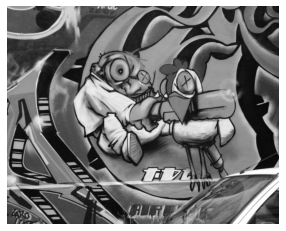

(640, 800)

In [ ]:
graf_img = cv2.imread('./Lab5/graf.png', 0)
plt.imshow(graf_img, cmap='gray'), plt.axis("off")
plt.show()
graf_img.shape

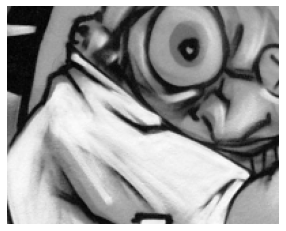

(160, 200)

In [ ]:
cropped_img = graf_img[160:320, 200:400]
plt.imshow(crop_img, cmap='gray'), plt.axis("off")
plt.show()
cropped_img.shape

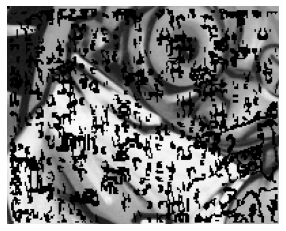

In [ ]:
cropped_img  =  harris(cropped_img , 1.6, 0.5)

In [ ]:
# resize in cv2
# ----------------------------------------------------------- #
scale_percent = 200 # percent of original size
width = int(crop_img.shape[1] * scale_percent / 100)
height = int(crop_img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
resized.shape
# ----------------------------------------------------------- #

(320, 400)

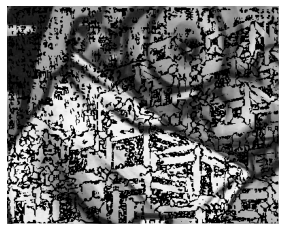

In [ ]:
resized  =  harris(resized , 1.6, 0.5)

### Region Descriptors

In [ ]:
from skimage.feature import hog

In [ ]:
def desc_grad(img, interest_points):
    """Write your code here"""
    pass